<a href="https://colab.research.google.com/github/EmnaGaidi/Deep-Learning/blob/main/TP3_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travail réalisé par :


*   GAIDI EMNA
*   OUESLATI SAFA
*   BEN AMMAR HAMZA




In [ ]:

import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
seed = 7
np.random.seed(seed)
K.set_image_data_format('channels_first')

In [ ]:
!pip install tensorflow==2.15.0


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


# Construction du premier réseau

In [ ]:
#load data
(X_train, y_train),(X_test, y_test)= mnist.load_data()

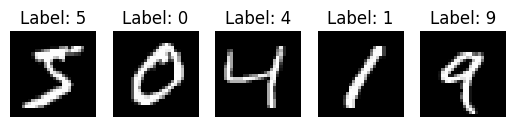

In [ ]:
import matplotlib.pyplot as plt

# Display the first few images from the training set
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
    plt.axis('off')
plt.show()

In [ ]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
#one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
def get_data_mnist(normalize=True):
    # Load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape data
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # Normalize data
    if normalize:
        X_train /= 255.0
        X_test /= 255.0

    # One-hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()

In [ ]:
def small_model():
  model = Sequential()
  # create model
  model = Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28),activation='relu'))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = small_model()

In [ ]:
K.set_image_data_format('channels_first')

In [ ]:
# Train the model
K.set_image_data_format('channels_first')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=200)


Epoch 1/70
300/300 [==============================] - 4s 10ms/step - loss: 0.2312 - accuracy: 0.9334 - val_loss: 0.0691 - val_accuracy: 0.9768
Epoch 2/70
300/300 [==============================] - 3s 10ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0537 - val_accuracy: 0.9818
Epoch 3/70
300/300 [==============================] - 5s 16ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0497 - val_accuracy: 0.9837
Epoch 4/70
300/300 [==============================] - 3s 11ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0414 - val_accuracy: 0.9857
Epoch 5/70
300/300 [==============================] - 4s 13ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 6/70
300/300 [==============================] - 5s 18ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 7/70
300/300 [==============================] - 4s 13ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0416 - val_accuracy: 0.9874

In [ ]:
# Evaluate the model before normalization
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9881
Test Loss: 0.12792576849460602
Test Accuracy: 0.988099992275238


In [ ]:
def print_model_error_rate(model, X_test, y_test):
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Model score : %.2f%%" % (scores[1]*100))
  print("Model error rate : %.2f%%" % (100-scores[1]*100))

In [ ]:
print_model_error_rate(model, X_test, y_test)

Model score : 98.81%
Model error rate : 1.19%


In [ ]:
# Evaluate the model after normalization
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9881
Test Loss: 0.12792576849460602
Test Accuracy: 0.988099992275238


In [ ]:
print_model_error_rate(model, X_test, y_test)

Model score : 98.81%
Model error rate : 1.19%


Le nouveau taux d'erreur est 1.39%. On remarque que le taux d'erreur a diminué après la normalisation des données.

# Construction du deuxième réseau

In [ ]:
def medium_CNN():
  model = Sequential()
  # create model
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model1 = medium_CNN()

In [ ]:
# Train the model
K.set_image_data_format('channels_first')
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 5ms/step - loss: 0.2535 - accuracy: 0.9281 - val_loss: 0.0808 - val_accuracy: 0.9757
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 0.0472 - val_accuracy: 0.9854
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0443 - val_accuracy: 0.9854
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0367 - val_accuracy: 0.9886
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0374 - val_accuracy: 0.9866
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch

In [ ]:
print_model_error_rate(model1, X_test, y_test)

Model score : 98.84%
Model error rate : 1.16%


In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0366 - accuracy: 0.9884
Test Loss: 0.036638375371694565
Test Accuracy: 0.9883999824523926


# Construction du troisième réseau

In [ ]:
def large_CNN():
  model = Sequential()
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
large_model = large_CNN()

In [ ]:
# Train the model
K.set_image_data_format('channels_first')
history = large_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 6ms/step - loss: 0.3144 - accuracy: 0.9069 - val_loss: 0.0780 - val_accuracy: 0.9763
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0797 - accuracy: 0.9760 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0360 - val_accuracy: 0.9878
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 

In [ ]:
print_model_error_rate(large_model, X_test, y_test)

Model score : 99.06%
Model error rate : 0.94%


In [ ]:
loss, accuracy = large_model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9906
Test Loss: 0.029201630502939224
Test Accuracy: 0.9905999898910522


# Sauvegarde et chargements des modèles Keras

In [ ]:
# This function saves a model on the drive using two files: a json and a h5
def save_keras_model(model, filename):
  # serialize model to JSON
  model_json = model.to_json()
  with open(filename+".json", "w") as json_file:
    json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(filename+".h5")

In [ ]:
from keras.models import model_from_json
# BE CAREFUL : the model NEEDS TO BE COMPILED before any use !
def load_keras_model(filename):
  # load json and create model
  json_file = open(filename+".json", 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(filename+".h5")
  return loaded_model

In [ ]:
save_keras_model(model, "CNN_model")

In [ ]:
load_keras_model("CNN_model")

In [ ]:
model=load_keras_model("CNN_model")

In [ ]:
from keras.preprocessing import image
import numpy as np
img_path = 'two.png'
img = image.load_img(img_path, target_size=(28, 28), grayscale=True)

In [ ]:
# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image data
img_array = img_array / 255.0

# Reshape the image to match the input shape of your model
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
# Make predictions using your trained model
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 16ms/step
Predicted class: 2
